In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


Import des données

In [ ]:
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df.head(10)
#df.shape

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


Type des variables

In [ ]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Proportion des death events

In [ ]:
fig = px.pie(df,names="DEATH_EVENT",title="Proportion of death events among the dataset")
fig.show()

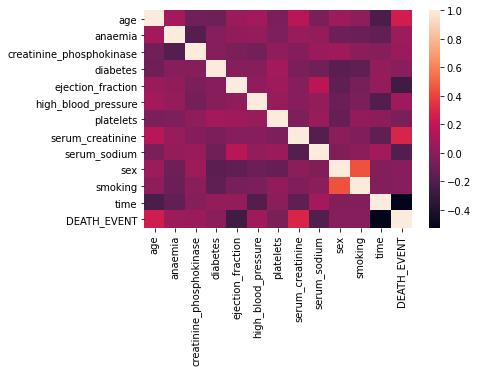

In [ ]:
hmap = sns.heatmap(df.corr())

In [ ]:
data = df.copy() # pour ne pas modifier l'import de base

In [ ]:
corr = data.corr()
corr[abs(corr['DEATH_EVENT'])>0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

Ici nous observons que 5 variables ont une corrélation avec 'death event' > 0.1

En revanche, je ne pense pas que la variable 'time' soit pertinente car ce type de variable ne serait pas disponible pour un diagnostic à un instant t
De ce fait, cette variable sera exclue pour nos prédictions

Splitting the data

In [ ]:
cols = ['ejection_fraction','serum_creatinine','serum_sodium']
cols2 = ['ejection_fraction','serum_creatinine','serum_sodium','time']
X = data[cols]
Y = data['DEATH_EVENT']
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=1,test_size=0.2)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,random_state=1,test_size=0.3)

### LINEAR REGRESSION

Accuracy for Logistic Regression : 80.00


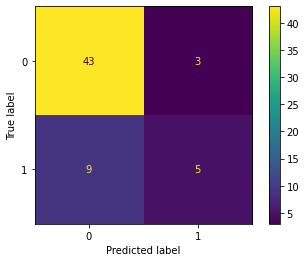

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix

lr = LogisticRegression(max_iter=250)
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
score = accuracy_score(y_test,pred)
print("Accuracy for Logistic Regression :","{:.2f}".format(score*100))
plot_confusion_matrix(lr, x_test, y_test)
plt.show()

### KNN

Best accuracy for KNN : 90.00  and was obtained with k = 14


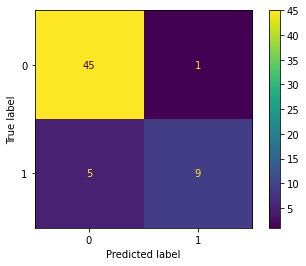

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

res = []
models = []
for i in range(2,15):
  models.append(KNeighborsClassifier(n_neighbors=i))
  models[i-2].fit(x_train,y_train)
  pred = models[i-2].predict(x_test)
  res.append((accuracy_score(y_test,pred)*100,i))
print("Best accuracy for KNN :","{:.2f}".format(max(res)[0])," and was obtained with k = {}".format(max(res)[1]))
plot_confusion_matrix(models[res.index(max(res))], x_test, y_test)
plt.show()

### Decision Tree Classifier 

Best accuracy for Decision Tree : 86.67  and was obtained with max_leaf_nodes = 2


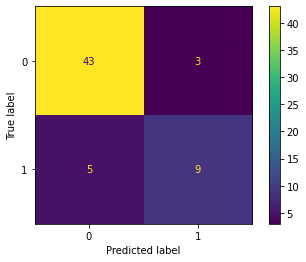

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# params = {'max_depth':[i for i in range(2,8)],
#           'max_leaf_nodes': [i for i in range(2,15)]
#          }

# tree = DecisionTreeClassifier(criterion='entropy')
# grid = GridSearchCV(estimator=tree,param_grid=params,n_jobs=4)
# grid.fit(x_train,y_train)
# pred = grid.best_estimator_.predict(x_test)
# score = accuracy_score(y_test,pred)
# print("Accuracy for Logistic Regression :","{:.2f}".format(score*100))
# plot_confusion_matrix(grid.best_estimator_, x_test, y_test)
# plt.show()

res = []
models = []
for i in range(2,15):
  models.append(DecisionTreeClassifier(max_leaf_nodes=i,criterion='entropy'))
  models[i-2].fit(x_train,y_train)
  pred = models[i-2].predict(x_test)
  res.append((accuracy_score(y_test,pred)*100,i))
print("Best accuracy for Decision Tree :","{:.2f}".format(max(res)[0])," and was obtained with max_leaf_nodes = {}".format(max(res)[1]))
plot_confusion_matrix(models[res.index(max(res))], x_test, y_test)
plt.show()


### Random Forest Classifier

Accuracy for Logistic Regression : 88.33


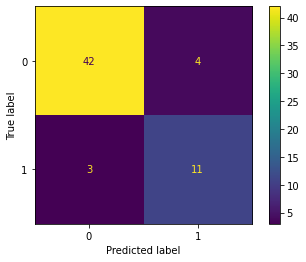

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50,random_state=1,max_leaf_nodes=7)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
score = accuracy_score(y_test,pred)
print("Accuracy for Logistic Regression :","{:.2f}".format(score*100))
plot_confusion_matrix(rf, x_test, y_test)
plt.show()

### XGB Classifier

[0]	validation_0-error:0.166667
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.222222
[2]	validation_0-error:0.180556
[3]	validation_0-error:0.166667
[4]	validation_0-error:0.138889
[5]	validation_0-error:0.152778
[6]	validation_0-error:0.138889
[7]	validation_0-error:0.236111
[8]	validation_0-error:0.138889
[9]	validation_0-error:0.194444
[10]	validation_0-error:0.180556
[11]	validation_0-error:0.166667
[12]	validation_0-error:0.125
[13]	validation_0-error:0.138889
[14]	validation_0-error:0.125
[15]	validation_0-error:0.152778
[16]	validation_0-error:0.152778
[17]	validation_0-error:0.194444
[18]	validation_0-error:0.138889
[19]	validation_0-error:0.194444
[20]	validation_0-error:0.180556
[21]	validation_0-error:0.180556
[22]	validation_0-error:0.180556
[23]	validation_0-error:0.180556
[24]	validation_0-error:0.194444
[25]	validation_0-error:0.180556
[26]	validation_0-error:0.180556
[27]	validation_0-error:0.194444
[28]	validation_0-error:0.

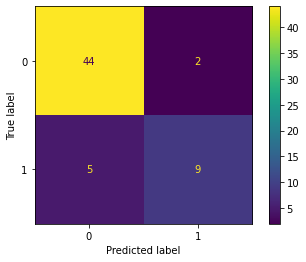

In [ ]:
from xgboost import XGBClassifier
from numpy import arange
from sklearn.model_selection import StratifiedKFold, GridSearchCV

params = {
        'min_child_weight': [i for i in range(1,10,3)],
        'gamma': [i for i in arange(0.5,6,0.5)],
        'subsample': [i for i in arange(0.6,1,0.1)],
        'colsample_bytree': [i for i in arange(0.6,1,0.1)],
        'max_depth': [i for i in range(3,8)]
        }


xgb = XGBClassifier(learning_rate=0.01,n_estimators=1000,objective='binary:logistic')
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)
grid = GridSearchCV(estimator=xgb,param_grid=params,n_jobs=4,cv=skf.split(x_train,y_train))
grid.fit(x_train,y_train,early_stopping_rounds=30,eval_set=[(x_val,y_val)])
print(grid.best_estimator_)
pred = grid.best_estimator_.predict(x_test)
score = accuracy_score(y_test,pred)
print("Accuracy for XGB Classifier :","{:.2f}".format(score*100))
plot_confusion_matrix(grid.best_estimator_, x_test, y_test)
plt.show()
